In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import defaultdict
import seaborn as sns
import scipy as sp

In [2]:
df = pd.read_csv('data/ug.csv')
#df = df.dropna()
n = len(df)
m = len(df.iloc[0])
df.head()


/var/folders/gw/d971_kg13gs_m96tktvpfw340000gp/T/ipykernel_24078/581783842.py:1: DtypeWarning: Columns (6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/ug.csv')


,ACTCOMP,SATCOMP,HS_GPA,gender,ethnicity,accepted,enrolled,year_incoming,inst,residency,SATV,SATM,athlete,accept,enroll
0,16.0,830.0,2.38,F,W,Y,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0
1,NaN,NaN,NaN,F,W,Y,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0
2,18.0,830.0,2.87,M,B,Y,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0
3,NaN,NaN,NaN,M,W,Y,Y,2006.0,Concord,0,NaN,NaN,NaN,1.0,1.0
4,NaN,NaN,NaN,F,B,N,N,2006.0,Concord,0,NaN,NaN,NaN,0.0,0.0


(array([504777.,  73621.,   8623.,      0.,  71514., 101000.,      0.,
          8887.,   8393.,  26855.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

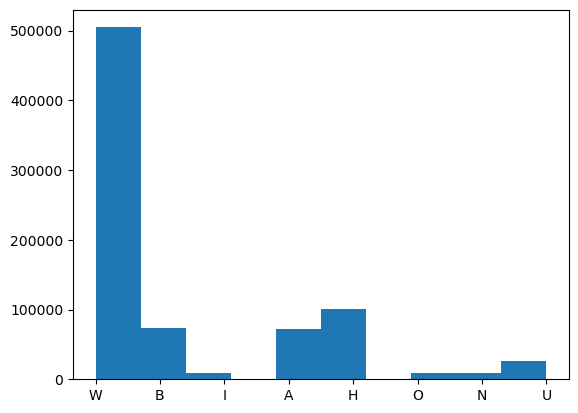

In [3]:
# Ethnicity & Accepted
df = df[df['ethnicity'].notna()]
df = df[df['accepted'].notna()]
x = list(df['ethnicity'])
y = list(df['accepted'])
plt.hist(x)

In [4]:
# Clean via vector
df['accepted'][df['accepted'] == "Y"] = 1.0
df['accepted'][df['accepted'] == "N"] = 0.0
df.head(5)

/var/folders/gw/d971_kg13gs_m96tktvpfw340000gp/T/ipykernel_24078/1252663438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['accepted'][df['accepted'] == "Y"] = 1.0
/var/folders/gw/d971_kg13gs_m96tktvpfw340000gp/T/ipykernel_24078/1252663438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['accepted'][df['accepted'] == "N"] = 0.0


,ACTCOMP,SATCOMP,HS_GPA,gender,ethnicity,accepted,enrolled,year_incoming,inst,residency,SATV,SATM,athlete,accept,enroll
0,16.0,830.0,2.38,F,W,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0
1,NaN,NaN,NaN,F,W,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0
2,18.0,830.0,2.87,M,B,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0
3,NaN,NaN,NaN,M,W,1.0,Y,2006.0,Concord,0,NaN,NaN,NaN,1.0,1.0
4,NaN,NaN,NaN,F,B,0.0,N,2006.0,Concord,0,NaN,NaN,NaN,0.0,0.0


In [5]:

def acceptanceRate(ethnicity):
    
    accepted = df[ (df['accepted'] == 1) & (df['ethnicity'] == ethnicity)]
    notAccepted = df[(df['accepted'] == 0) & (df['ethnicity'] == ethnicity)]
    t = len(accepted)
    f = len(notAccepted)
    print('ethnicity:',ethnicity,' Acceptance Rate:',round(t/(t+f),2))
    return (round(t/(t+f),2),accepted,notAccepted)

def scores(ethnicity,col):
    tdf = df[(df['ethnicity'] == ethnicity)]
    deltaVar = tdf[col]
    # changing this value wow
    #tdf = tdf[(tdf['HS_GPA'] >= 0) & (tdf['HS_GPA'] <= 4)]
    mu = deltaVar.mean()
    sigma = deltaVar.std()
    print(ethnicity, 'mu:',round(mu,2),'sigma:',round(sigma,2))
    bx = plt.boxplot(deltaVar,vert=False)
    plt.close()
    return mu,sigma,bx

ethos = ['B','W','A','H','U','O','U']

for etho in ethos:
    acceptanceRate(etho)
    scores(etho,'SATCOMP')


ethnicity: B  Acceptance Rate: 0.44
B mu: 797.81 sigma: 389.31
ethnicity: W  Acceptance Rate: 0.66
W mu: 941.1 sigma: 470.82
ethnicity: A  Acceptance Rate: 0.62
A mu: 1010.48 sigma: 386.27
ethnicity: H  Acceptance Rate: 0.56
H mu: 885.44 sigma: 325.52
ethnicity: U  Acceptance Rate: 0.61
U mu: 934.0 sigma: 425.79
ethnicity: O  Acceptance Rate: 0.48
O mu: 959.29 sigma: 364.23
ethnicity: U  Acceptance Rate: 0.61
U mu: 934.0 sigma: 425.79


42.31092726195788
111.1977475318279


,ACTCOMP,SATCOMP,HS_GPA,gender,ethnicity,accepted,enrolled,year_incoming,inst,residency,SATV,SATM,athlete,accept,enroll
0,16.0,830.0,2.38,F,W,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0
2,18.0,830.0,2.87,M,B,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0
5,13.0,NaN,3.30,F,I,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0
6,NaN,830.0,3.37,F,W,0.0,N,2006.0,Concord,0,NaN,NaN,NaN,0.0,0.0


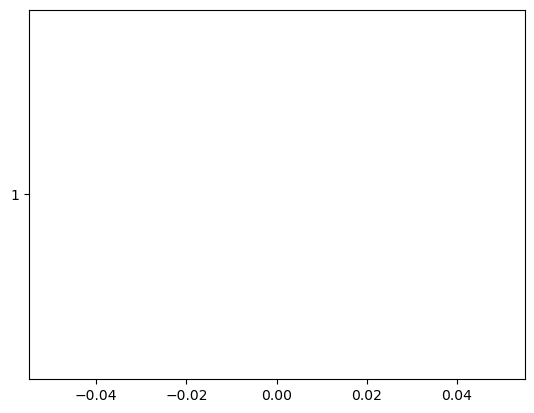

In [6]:
# Clean data example how it changes scores
print(df['HS_GPA'].mean())
print(df['HS_GPA'].std())
plt.boxplot(df['HS_GPA'],vert=False)
# TODO: DEMO THIS LINE
gpaCleaned = df[(df['HS_GPA'] >= 0) & (df['HS_GPA'] <= 5)]
gpaCleaned.head(4)

ethnicity: B  Acceptance Rate: 0.44
ethnicity: W  Acceptance Rate: 0.66
ethnicity: A  Acceptance Rate: 0.62
ethnicity: H  Acceptance Rate: 0.56


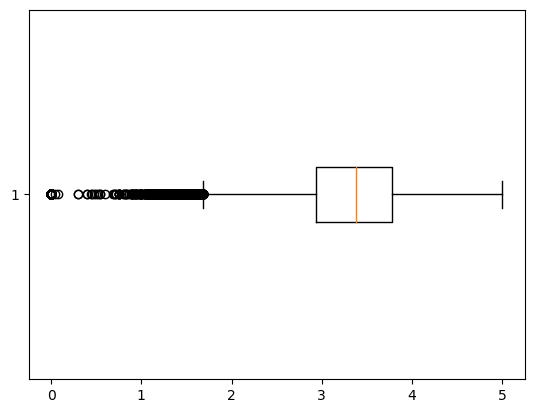

In [7]:
plt.boxplot(gpaCleaned['HS_GPA'],vert=False)
r,y,n = acceptanceRate('B')
r1,y1,n1 = acceptanceRate('W')
r2,y2,n2 = acceptanceRate('A')
r3,y3,n3 = acceptanceRate('H')

(array([2.9732e+04, 2.0000e+00, 2.1900e+02, 3.7730e+03, 2.2290e+04,
        5.7999e+04, 7.8509e+04, 6.6335e+04, 3.2692e+04, 8.1540e+03]),
 array([   0.,  160.,  320.,  480.,  640.,  800.,  960., 1120., 1280.,
        1440., 1600.]),
 <BarContainer object of 10 artists>)

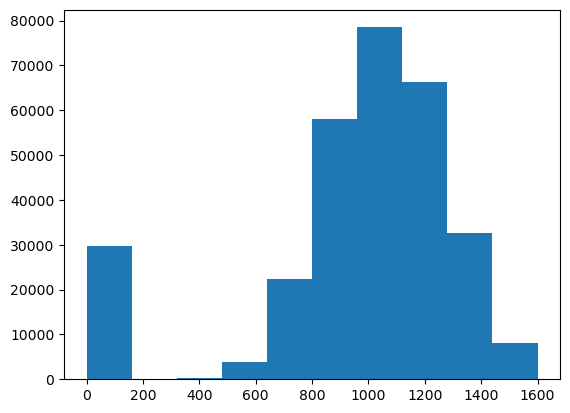

In [8]:
plt.hist(gpaCleaned['SATCOMP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7febd190f850>,
 'caps': [<matplotlib.lines.Line2D at 0x7febd190fdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7febd190f580>],
 'medians': [<matplotlib.lines.Line2D at 0x7febd191e3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7febd191e6a0>],
 'means': []}

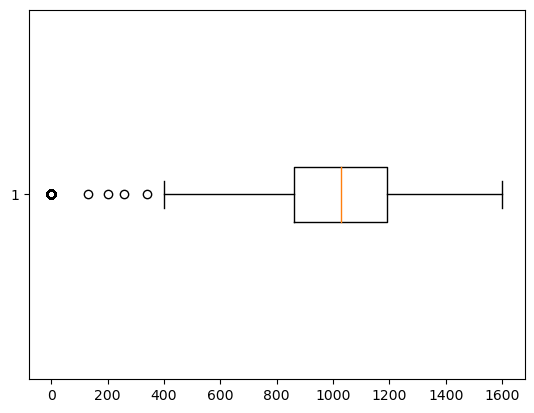

In [9]:
plt.boxplot(gpaCleaned['SATCOMP'].dropna(),vert=False)

In [10]:
print(set(gpaCleaned['inst']))

{'MN Morris', 'KS', 'MI State', 'Concord', 'Indiana', 'Humboldt State', 'NC State', 'GA Tech', 'Clemson', 'SE LA', 'US Coast Guard Academy', 'CSULB', 'Truman State', 'MN Twin Cities', 'Iowa', 'WI Stout', 'Framingham', 'NW MO State', 'FL Atlantic', 'Miami of Ohio', 'IL Springfield', 'WA Bothell', 'MA College of Art', 'CSULA', 'SUNY Alfred', 'IN State', 'Auburn', 'MO State', 'UNC Asheville', 'Mesa State'}


In [11]:
m = list(gpaCleaned['ethnicity'].unique())
n = range(len(m))
gpa = list(gpaCleaned['HS_GPA'])
y = list(gpaCleaned['ethnicity'])
accepted =list(gpaCleaned['accepted'])
colors = [i for i in n]
# accept vs. accepted tricky trick
gpaCleaned['cat'] = gpaCleaned['ethnicity']
gpaCleaned['cat'].replace(m,colors,inplace=True)
#gpaCleaned.head(5)
gpaCleaned.corr()
gpaCleaned.head(5)

/var/folders/gw/d971_kg13gs_m96tktvpfw340000gp/T/ipykernel_24078/1094907223.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpaCleaned['cat'] = gpaCleaned['ethnicity']
/var/folders/gw/d971_kg13gs_m96tktvpfw340000gp/T/ipykernel_24078/1094907223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpaCleaned['cat'].replace(m,colors,inplace=True)


,ACTCOMP,SATCOMP,HS_GPA,gender,ethnicity,accepted,enrolled,year_incoming,inst,residency,SATV,SATM,athlete,accept,enroll,cat
0,16.0,830.0,2.38,F,W,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0,0
2,18.0,830.0,2.87,M,B,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0,1
5,13.0,NaN,3.30,F,I,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0,2
6,NaN,830.0,3.37,F,W,0.0,N,2006.0,Concord,0,NaN,NaN,NaN,0.0,0.0,0
7,NaN,960.0,3.83,M,W,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0,0


In [26]:
class colByEth:
    def __init__(self,mu,sigma,etho,col):
        self.mu = mu
        self.sigma = sigma
        self.etho = etho
        self.col = col
        # changing this value wow
        #tdf = tdf[(tdf['HS_GPA'] >= 0) & (tdf['HS_GPA'] <= 4)]
        #self.info = print(etho, 'mu:',round(self.mu,2),'sigma:',round(self.sigma,2))
        self.n = len(self.col[self.col['ethnicity']== etho])
        self.bx = self.col[ (self.col['ethnicity']== etho) & (self.col['accepted']==1.0)]
        self.arate = round(len(self.bx)/self.n,3)

    
    def t_test(x,y):
        pass

res = []
def ScoresByEthos(etho,cols):
    meow = df[ (df['ethnicity'] == etho)]
    print(etho,':mu', round(meow[cols].mean(),2),'sigma:', 
          round(meow[cols].std(),2))
    obj = colByEth(
        round(meow[cols].mean(),2),
        round(meow[cols].std(),2),
        etho,
        meow
    )
    
    obj.col['accepted'] = obj.col['accepted'].astype(float)
    return obj
    
for i in ['B','W','A','H']:
    res.append(ScoresByEthos(i,'SATM'))

B :mu 380.84 sigma: 197.66
W :mu 450.15 sigma: 245.42


/var/folders/gw/d971_kg13gs_m96tktvpfw340000gp/T/ipykernel_24078/3431892522.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj.col['accepted'] = obj.col['accepted'].astype(float)


A :mu 521.14 sigma: 212.34
H :mu 473.4 sigma: 129.52


In [13]:
res[0].arate

0.44

In [14]:
# Cleaning NaNs Lesson Connection
x = list(res[0].col['SATCOMP'].dropna())
y = list(res[1].col['SATCOMP'].dropna())
summary, results = sp.stats.ttest_ind(x,y)
print(summary)
print(results)

-62.97482135156335
0.0


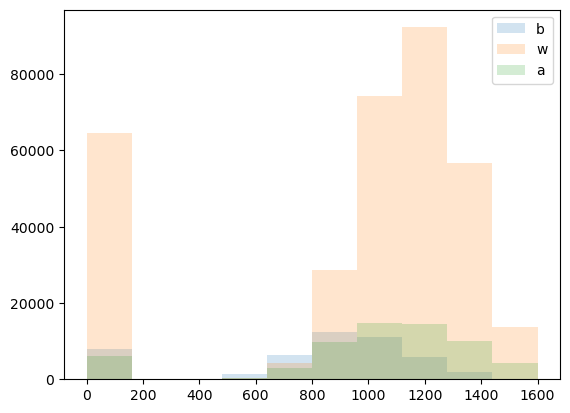

In [37]:
def histCompare(colName):
    plt.hist(res[0].col[colName],alpha=0.2,label='b')
    plt.hist(res[1].col[colName],alpha=0.2,label='w')
    plt.hist(res[2].col[colName],alpha=0.2,label='a')
    plt.legend()

histCompare('SATCOMP')


In [32]:
dfMath = df[df['SATM'].notna()]
dfMath.corr()
df.head(4)

,ACTCOMP,SATCOMP,HS_GPA,gender,ethnicity,accepted,enrolled,year_incoming,inst,residency,SATV,SATM,athlete,accept,enroll
0,16.0,830.0,2.38,F,W,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0
1,NaN,NaN,NaN,F,W,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0
2,18.0,830.0,2.87,M,B,1.0,N,2006.0,Concord,0,NaN,NaN,NaN,1.0,0.0
3,NaN,NaN,NaN,M,W,1.0,Y,2006.0,Concord,0,NaN,NaN,NaN,1.0,1.0
